## 2019 Data Science Bowl

<img src="https://i.ibb.co/t2wvB6F/Meas.png" width="700"> 

*In this dataset, you are provided with game analytics for the PBS KIDS Measure Up! app. In this app, children navigate a map and complete various levels, which may be activities, video clips, games, or assessments. Each assessment is designed to test a child's comprehension of a certain set of measurement-related skills.*

**Content**
1. [Importing Libraries and Loading Dataset](#1)
1. [EDA & Data Visualization](#2)
1. [Ending](#3)

<a id="1"></a> <br>
# Importing Libraries and Loading Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud

init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a> <br>
# EDA & Data Visualization

In [2]:
df_train = pd.read_csv("../input/data-science-bowl-2019/train.csv", parse_dates=["timestamp"])
df_train_labels = pd.read_csv("../input/data-science-bowl-2019/train_labels.csv")
df_specs = pd.read_csv("../input/data-science-bowl-2019/specs.csv")
df_sample_submission = pd.read_csv("../input/data-science-bowl-2019/sample_submission.csv")
df_test = pd.read_csv("../input/data-science-bowl-2019/test.csv", parse_dates=["timestamp"])

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          datetime64[ns, UTC]
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 951.8+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156414 entries, 0 to 1156413
Data columns (total 11 columns):
event_id           1156414 non-null object
game_session       1156414 non-null object
timestamp          1156414 non-null datetime64[ns, UTC]
event_data         1156414 non-null object
installation_id    1156414 non-null object
event_count        1156414 non-null int64
event_code         1156414 non-null int64
game_time          1156414 non-null int64
title              1156414 non-null object
type               1156414 non-null object
world              1156414 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 97.1+ MB


In [5]:
print("Train Set Total Row Number: {0} \nTrain Set Total Col Number: {1}".format(df_train.shape[0], df_train.shape[1]))

Train Set Total Row Number: 11341042 
Train Set Total Col Number: 11


There are nearly 11.5 M rows in Train dataset. 

In [6]:
print("Test Set Total Row Number: {0} \nTest Set Total Col Number: {1}".format(df_test.shape[0], df_test.shape[1]))

Test Set Total Row Number: 1156414 
Test Set Total Col Number: 11


In [7]:
df_train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [8]:
print(df_train.loc[:, df_train.isnull().any()].isnull().sum())

Series([], dtype: float64)


There aren't any null values in all the dataset.

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
event_count,11341042.0,105.664210,1.483477e+02,1.0,25.0,61.0,129.0,3368.0
event_code,11341042.0,3513.838411,6.816470e+02,2000.0,3021.0,4020.0,4035.0,5010.0
game_time,11341042.0,197623.565578,1.803968e+06,0.0,30618.0,72761.0,157446.0,306910249.0


In [10]:
train_types = df_train["type"].value_counts()
test_types = df_test["type"].value_counts()

In [11]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(values=train_types, labels=train_types.index.tolist(), name="Train" , hole=.3),
    1, 1)

fig.add_trace(
    go.Pie(values=test_types, labels=test_types.index.tolist(), name="Test" , hole=.3),
    1, 2)

fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=17, textposition="inside",
                  marker=dict(colors=['gold', 'mediumturquoise', 'darkorange', 'plum'],  
                              line=dict(color='#000000', width=2)
                             )
                 )

fig.update_layout(
    title_text="Media Type of The Game or Video",
    height=500, width=800,
    annotations=[dict(text='Train', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Test', x=0.82, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

There are close distribution between train and test dataset. The difference is that train dataset has 10 times more data than test dataset. It can be viewed by hovering the pie chart.

In [12]:
train_worlds = df_train["world"].value_counts()
test_worlds = df_test["world"].value_counts()

In [13]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'}, {'type':'xy'}]])

fig.add_trace(
    go.Bar(y=train_worlds.values, x=train_worlds.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=test_worlds.values, x=test_worlds.index),
    row=1, col=2
)

fig.update_layout(
    title_text="World of Apps",
    height=500, width=800, showlegend=False)

fig['layout']['xaxis1'].update(title='Train')
fig['layout']['xaxis2'].update(title='Test')

fig.show()

"CRYSTALCAVES" and "TREETOPCITY" ratio has varied on test and train dataset.

In [14]:
eventbyinstallation = df_train.groupby(["installation_id"])["event_code"].nunique()

fig = px.histogram(x=eventbyinstallation,
                   title='Unique Event Code Count by Installation Id',
                   opacity=0.8,
                   color_discrete_sequence=['indianred']
                  )

fig.update_layout(
    yaxis_title_text='',
    xaxis_title_text='',
    height=500, width=800
)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.8
                 )

fig.show()

In [15]:
event_id_by_ins_id_1 = df_train.groupby(["installation_id"])["event_id"].agg("count").sort_values(ascending=False)[382:]
event_id_by_ins_id_2 = df_train.groupby(["installation_id"])["event_id"].agg("count").sort_values(ascending=False)[:382]

fig = make_subplots(rows=1, cols=2)

trace1 = go.Histogram(x=event_id_by_ins_id_1,
                 marker_color='#FF9999',
                 opacity=0.2,
                 nbinsx=40
                     )

trace2 = go.Histogram(x=event_id_by_ins_id_2,
                 marker_color='#9999CC',
                 opacity=0.75,
                 nbinsx=40
                )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)


fig.update_layout(
    height=500, width=800, showlegend=False,
    title='Event Count by Installation Id',
  )

fig['layout']['xaxis1'].update(title='Part 1: 0-5k')
fig['layout']['xaxis2'].update(title='Part 2: 5k-60k')

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.8
                 )

fig.show()

For a better visual, I had to split the histogram chart into two parts.

In [16]:
df_events = df_train.loc[:,['timestamp', 'event_id','game_time']]
df_events["date"] = df_events['timestamp'].dt.date

In [17]:
event_count = df_events.groupby(['date'])['event_id'].agg('count')
game_time_sum = df_events.groupby(['date'])['game_time'].agg('sum')

fig = go.Figure()

fig.add_trace(go.Scatter(x=event_count.index, y=event_count.values,
                         line=dict(color='firebrick', width=3)
                        )
             )

fig.update_layout(title='Event Counts By Date',
                   xaxis_title='Date',
                   yaxis_title='Count',
                   width=850, height=400)

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=game_time_sum.index, y=game_time_sum.values,
                         line=dict(color='midnightblue', width=3)
                        )
             )


fig.update_layout(title='Total Game Time By Date',
                   xaxis_title='Date',
                   yaxis_title='Total',
                   width=850, height=400)

fig.show()

In [18]:
df_events["weekdays"] = df_events['timestamp'].dt.weekday_name

gametime_wdays = df_events.groupby(['weekdays'])['game_time'].agg('sum')
gametime_wdays = gametime_wdays.T[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

fig = px.bar(x=gametime_wdays.index, y=gametime_wdays.values)

fig.update_traces(marker_color='mediumvioletred', marker_line_color='rgb(8,48,107)',
                  marker_line_width=2, opacity=0.7
                 )

fig.update_layout(title='Total Game Time By Day',
                   xaxis_title='Weekdays',
                   yaxis_title='Total',
                   width=600, height=400
                 )
fig.show()

In [19]:
title_words = []

for i in df_test["title"]:
    for j in i.split(" "):
        title_words.append(j) 

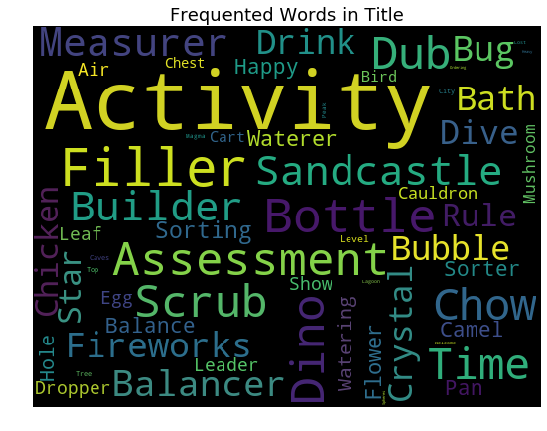

In [20]:
plt.subplots(figsize=(14,7))
wc=wordcloud = WordCloud( collocations=False,
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(title_words
                                            )
                                   )

plt.imshow(wc)
plt.axis('off')
plt.title("Frequented Words in Title", fontsize=18)
plt.imshow(wc.recolor(colormap= 'viridis', random_state=2), alpha=0.90)

plt.show()

<a id="3"></a> <br>
# Ending

#### To be continued... If you like the kernel, Please upvote.